In [3]:
%matplotlib inline

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


path =r'./data/volleyball_women'
all_files = glob.glob(path + "/*.csv")

years = []
for item in all_files:
    years.append(item[-8:-4:])

frames = []

for year in years:
    path_name = path + "/women_volleyball_" + year + ".csv"
    df = pd.read_csv(path_name, index_col=None,header=0)
    df['Year'] = year
    frames.append(df)

data = pd.concat(frames, ignore_index=True)
data.head(30)

,Date,Opponent,UCSD Rank,Opp Rank,Location,Won,Conference,UCSD Score,Opp Score,Year
0,"Thu, Aug 25",Point Loma,13,-,Carson,1,0,3,2,2005
1,"Thu, Aug 25",Bridgeport,13,-,Carson,1,0,3,0,2005
2,"Fri, Aug 26",Concordia (N.Y.),13,-,Carson,1,0,3,0,2005
3,"Tue, Aug 30",Point Loma,13,-,UC San Diego,1,0,3,2,2005
4,"Fri, Sep 02",St. Martins,13,-,San Bernardino,1,0,3,0,2005
5,"Fri, Sep 02",Hawaii Pacific,13,8,San Bernardino,0,0,0,3,2005
6,"Sat, Sep 03",Northwood,13,16,San Bernardino,1,0,3,0,2005
7,"Sat, Sep 03",Northwest Nazarene,13,-,San Bernardino,1,0,3,0,2005
8,"Thu, Sep 08",Grand Canyon,10,-,UC San Diego,1,0,3,1,2005
9,"Sat, Sep 10",Cal State San Bernardino*,10,2,San Bernardino,0,1,1,3,2005


In [5]:
#drop non-conference games
data = data[data.Conference == 1]

In [6]:
#make a dataframe to hold statistics of games won and played for each year
columns = ['Played','Won','Percent_Won']
summary = pd.DataFrame(index=years,columns=columns)
summary

,Played,Won,Percent_Won
2005,NaN,NaN,NaN
2006,NaN,NaN,NaN
2007,NaN,NaN,NaN
2008,NaN,NaN,NaN
2009,NaN,NaN,NaN
2010,NaN,NaN,NaN
2011,NaN,NaN,NaN
2012,NaN,NaN,NaN
2013,NaN,NaN,NaN
2014,NaN,NaN,NaN


In [7]:
for year in years:
    played = len(data[data['Year'] == year])
    won = len(data[ (data['Year'] == year) & (data['Won'] == 1) ])
    summary.ix[year] = [played, won, float(won)/float(played)]

summary

,Played,Won,Percent_Won
2005,18,11,0.6111111
2006,20,18,0.9
2007,18,13,0.7222222
2008,20,15,0.75
2009,22,20,0.9090909
2010,22,15,0.6818182
2011,22,17,0.7727273
2012,22,15,0.6818182
2013,22,17,0.7727273
2014,22,12,0.5454545


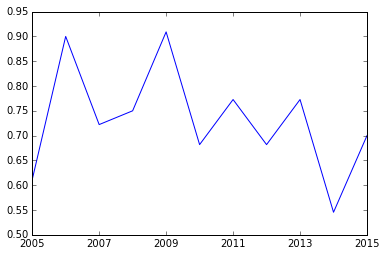

In [21]:
#basic pandas plot
summary['Percent_Won'].plot(kind='line')

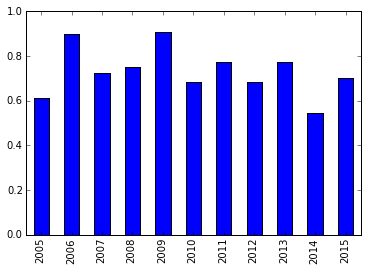

In [24]:
#matplotlib attempt #1
percents = pd.Series(summary['Percent_Won'])
plt.figure()

percents.plot(kind='bar')

([<matplotlib.axis.XTick at 0x10d7962d0>,
 <a list of 11 Text xticklabel objects>)

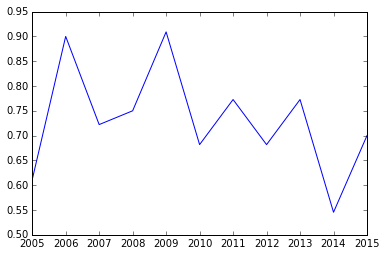

In [27]:
#matplotlib attempt #2
plt.figure()

percents.plot(kind='line')

x = range(0,len(years))
plt.xticks(x, years)